In [1]:
import nltk

from nltk.tokenize import word_tokenize
from nltk.chunk.regexp import *

In [4]:
ejemplo = "I want a dress for a wedding"
tokens = word_tokenize(ejemplo)
print(tokens)

['I', 'want', 'a', 'dress', 'for', 'a', 'wedding']


In [5]:
tokens_min = [w.lower() for w in tokens]

In [8]:
nltk.pos_tag(tokens_min)

[('i', 'NN'),
 ('want', 'VBP'),
 ('a', 'DT'),
 ('dress', 'NN'),
 ('for', 'IN'),
 ('a', 'DT'),
 ('wedding', 'NN')]

In [7]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/A066509/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

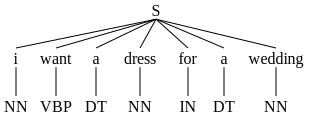

In [15]:
entities = nltk.chunk.ne_chunk(nltk.pos_tag(tokens_min))
entities

In [16]:
grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'i'
VP -> V NP | VP PP
Det -> 'a'
N -> 'dress' | 'wedding'
V -> 'want'
P -> 'for'                            
""")

In [18]:
parser = nltk.ChartParser(grammar)

def parsear(_tokens):
    return parser.parse(_tokens)

In [22]:
for tree in parsear(tokens_min):
    print(tree, '\n')
    tree.pretty_print()

(S
  (NP i)
  (VP
    (VP (V want) (NP (Det a) (N dress)))
    (PP (P for) (NP (Det a) (N wedding))))) 

     S                                    
  ___|_____________                        
 |                 VP                     
 |         ________|________               
 |        VP                PP            
 |    ____|___           ___|___           
 |   |        NP        |       NP        
 |   |     ___|____     |    ___|_____     
 NP  V   Det       N    P  Det        N   
 |   |    |        |    |   |         |    
 i  want  a      dress for  a      wedding

(S
  (NP i)
  (VP
    (V want)
    (NP (Det a) (N dress) (PP (P for) (NP (Det a) (N wedding)))))) 

     S                                
  ___|_________                        
 |             VP                     
 |    _________|____                   
 |   |              NP                
 |   |     _________|___               
 |   |    |    |        PP            
 |   |    |    |     ___|___           


In [24]:
ejemplo2 = "Me gusta llegar puntual a clase"
tokens2 = word_tokenize(ejemplo2)
tokens2_min = [w.lower() for w in tokens2]
print(tokens2_min)

['me', 'gusta', 'llegar', 'puntual', 'a', 'clase']


In [25]:
grammar2 = nltk.CFG.fromstring("""
S -> VP
VP -> 'me' V INF
INF -> V ADV PP
V -> 'gusta' | 'llegar'
ADV -> 'puntual'
PP -> 'a' NP
NP -> 'clase'
""")

In [28]:
parser2 = nltk.ChartParser(grammar2)

def parsear2(_tokens):
    return parser2.parse(_tokens)

In [29]:
for tree in parsear2(tokens2_min):
    print(tree, '\n')
    tree.pretty_print()

(S
  (VP me (V gusta) (INF (V llegar) (ADV puntual) (PP a (NP clase))))) 

            S                         
            |                          
            VP                        
  __________|_______                   
 |    |            INF                
 |    |      _______|_________         
 |    |     |       |         PP      
 |    |     |       |      ___|____    
 |    V     V      ADV    |        NP 
 |    |     |       |     |        |   
 me gusta llegar puntual  a      clase



In [47]:
frase3 = "Pepe y María cocinan brownies"
tokens3 = word_tokenize(frase3)
tokens3_min = [w.lower() for w in tokens3]
print(tokens3_min)

['pepe', 'y', 'maría', 'cocinan', 'brownies']


In [50]:
grammar3 = nltk.CFG.fromstring("""
S -> Otros Suj Accion Otros Accion | Otros Suj Accion | Suj Accion
Suj -> Persona | Persona Otros Persona
Accion -> V N | V Otros N
Persona -> 'abuela' | 'mujer' | 'pepe' | 'maría'
V -> 'bebe' | 'fuma' | 'compra' | 'cocinan'
N -> 'vodka' | 'porros' | 'coche' | 'brownies'
Otros -> 'y' | 'la' | 'La' | 'un'
""")

parser = nltk.ChartParser(grammar3)

In [51]:
for tree in parser.parse(tokens3_min):
    print(tree, '\n')
    tree.pretty_print()

(S
  (Suj (Persona pepe) (Otros y) (Persona maría))
  (Accion (V cocinan) (N brownies))) 

                 S                           
           ______|______________              
         Suj                  Accion         
    ______|______         ______|_______      
Persona Otros Persona    V              N    
   |      |      |       |              |     
  pepe    y    maría  cocinan        brownies

